# Prediction of Health Expenditure In Malaysia Using Machine Learning

This is a project proposal under Research Design and Analysis in Data Science (MCST1043), authored by Lock Chun Hern (MCST 241047)




## Introduction

Rising healthcare expenditure is a global challenge. The escalation of healthcare cost, caused by the inflation in medication prices, medical expenses, and the ageing population in Malaysia, necessitates the development of a robust predictive model for health expenditure to aid in the planning of future healthcare budgets. From previous researches, it is suggested that machine learning algorithms have great potential when used in modern health economies. 

## Aim and Objectives

Research Aim:

The aim of this research project is to predict health expenditure in Malaysia using machine learning techniques to provide insight for health financing and policy planning.

Research Objectives:

a) 	To identify the key determinants of health expenditure to use as features for machine learning algorithms

b)	To implement Random Forest and ARIMA for predicting health expenditure in Malaysia from 2026 to 2035 

c)	To evaluate and compare the performance metrics of the machine learning models and to identify the model with the highest accuracy in forecasting health expenditure in Malaysia


## Datasets

4 datasets will be used for this study. Data are collected from Ministry of Health Malaysia website, WHO Global Health Expenditure Database and World Development Indicators Database. **MHNA_2022.csv** and **MHNA_2017.csv** datasets were scraped from the table in MHNA 2022.pdf and MHNA 2017.pdf to provide accurate data on total health expenditure. The table scraping was done by using importing tabula library in Python. The scraped table is saved in the form of a CSV file. The third dataset **NHA indicators.xlsx** is downloaded from the data explorer of the WHO Global Health Expenditure Database, assessed on 26 May 2025. The last dataset, **P_Data_Extract_From_World_Development_Indicators.csv** is downloaded from World Development Indicators Database. 

### Data scraping

Data scaping for total health expenditure from PDF MHNA 2022 and MHNA 2017 are done using tabula.

In [11]:
# Import libaries and necessary files
import pandas as pd
import numpy as np
import tabula


In [12]:
# setting path to pdf and page number
pdf_path2= 'mnha_2022.pdf'
page_num2 = 32

# Extract table 
mhna_2022 = tabula.read_pdf(pdf_path2, pages= page_num2)

print(mhna_2022[0])

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'
Got stderr: Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser validateStreamLength
Jun 30, 2025 11:37:24 AM org.apache.pdfbox.pdfparser.COSParser 

   TABLE 4.1: Total Expenditure on Health, 2011-2022 (RM Million & Percent GDP)  \
0                                          Total GDP,                             
1             TEH, Nominal TEH, Constant MNHA Derived                             
2                                        Year Nominal                             
3             (RM Million) (RM Million)* GDP Deflator                             
4                                      (RM Million)**                             
5                       2011 35,953 44,029 911,733 82                             
6                       2012 39,448 47,831 971,252 82                             
7                     2013 41,647 50,410 1,018,614 83                             
8                     2014 46,780 55,259 1,106,443 85                             
9                     2015 50,256 59,583 1,176,941 84                             
10                    2016 51,756 60,360 1,249,698 86                             
11  

In [13]:
#path to pdf and page number
pdf_path1= 'Laporan_MNHA_Health_Expenditure_Report_1997-2017_03122019.pdf'
page_num1 = 35

#Extract table
mhna_2017 = tabula.read_pdf(pdf_path1,pages= page_num1)

print(mhna_2017)


[   TABLE 4.1: Total Expenditure on Health, 1997-2017 (RM Million & Percent GDP)  \
0                              Expenditure Total GDP,                             
1             TEH, Nominal TEH, Constant MNHA Derived                             
2                                             Nominal                             
3                                                Year                             
4            (RM Million) (RM Million)* GDP Deflator*                             
5                                      (RM Million)**                             
6                        1997 8,550 15,374 281,795 64                             
7                        1998 9,156 15,189 283,243 69                             
8                        1999 9,953 16,512 300,764 69                             
9                       2000 11,745 18,528 356,401 73                             
10                      2001 12,703 20,448 352,579 72                             
11 

In [14]:
# Step 1: Drop top rows that are just titles or headers
df = mhna_2017[0].copy()

# Step 2: Drop the first 6 rows (based on your structure)
df_clean = df.iloc[6:].reset_index(drop=True)

# Step 3: Split the single column into multiple columns
df_clean = df_clean[ df_clean.columns[0] ].str.split(r'\s+', expand=True)

# Step 4: Rename the columns
df_clean.columns = ['Year', 'TEH_Nominal', 'TEH_Constant', 'GDP', 'GDP_Deflator']

# Step 5: Extract only the TEH column 
df1_extracted= df_clean[['Year', 'TEH_Nominal']]

# Final preview
print(df1_extracted)
df1_extracted.to_csv("mhna_2017.csv")

    Year TEH_Nominal
0   1997       8,550
1   1998       9,156
2   1999       9,953
3   2000      11,745
4   2001      12,703
5   2002      13,640
6   2003      17,203
7   2004      18,200
8   2005      18,231
9   2006      22,072
10  2007      24,414
11  2008      27,758
12  2009      29,365
13  2010      32,872
14  2011      35,937
15  2012      39,505
16  2013      41,625
17  2014      46,828
18  2015      50,176
19  2016      52,018
20  2017      57,361


In [15]:
# Get the first (and only) DataFrame from the list
df2 = mhna_2022[0]

# Step 1: Remove the first 5 rows
df2_clean = df2.iloc[5:].reset_index(drop=True)

# Step 2: Split the single text column into multiple columns
df2_clean = df2_clean[df2_clean.columns[0]].str.split(r'\s+', expand=True)

# Step 3: Rename columns
df2_clean.columns = ['Year', 'TEH_Nominal', 'TEH_Constant', 'GDP', 'GDP_Deflator']

#extract only year and teh_nominal column
df2_extracted= df2_clean[['Year', 'TEH_Nominal']]

# Preview
print(df2_extracted)
df2_extracted.to_csv("mhna_2022.csv")

    Year TEH_Nominal
0   2011      35,953
1   2012      39,448
2   2013      41,647
3   2014      46,780
4   2015      50,256
5   2016      51,756
6   2017      56,404
7   2018      60,528
8   2019      64,336
9   2020      67,051
10  2021      77,703
11  2022      78,945


## Data Pre-processing

The data pre-processing for this project can be divided into the following subsections: preliminary analysis, data cleaning, data integration and feature engineering. Each step is crucial in ensuring the quality of the data for analysis and modelling.  This step is done iteratively with exploratory data analysis to prepare a cleaned dataset before modelling.

All the collected dataset needs to be cleaned before applying a machine learning model to ensure accurate prediction is obtained and prevent errors from occurring due to missing values or inappropriate formats. The data cleaning process will be done on each dataset individually before merging together.

### 1. Data cleaning and concatenation of datasets from mhna_2017 and mhna_2022

In [19]:
# import dataset
df1_extracted = pd.read_csv('mhna_2017.csv', index_col=0)
df2_extracted = pd.read_csv('mhna_2022.csv', index_col=0)

# view info for both csv
print(df1_extracted.head())
print(df2_extracted.head())

   Year TEH_Nominal
0  1997       8,550
1  1998       9,156
2  1999       9,953
3  2000      11,745
4  2001      12,703
   Year TEH_Nominal
0  2011      35,953
1  2012      39,448
2  2013      41,647
3  2014      46,780
4  2015      50,256


In [20]:
# convert year to int
df1_extracted["Year"] = df1_extracted["Year"].astype(int)

# take only 2000 to 2010 data from df1_extracted
df1_2000_2010 = df1_extracted[(df1_extracted['Year'] >= 2000) & (df1_extracted['Year'] <= 2010)]
print (df1_2000_2010)

    Year TEH_Nominal
3   2000      11,745
4   2001      12,703
5   2002      13,640
6   2003      17,203
7   2004      18,200
8   2005      18,231
9   2006      22,072
10  2007      24,414
11  2008      27,758
12  2009      29,365
13  2010      32,872


In [21]:
#combine 2 table into one according to year using concat
df_combined = pd.concat([df1_2000_2010, df2_extracted])
print(df_combined)

    Year TEH_Nominal
3   2000      11,745
4   2001      12,703
5   2002      13,640
6   2003      17,203
7   2004      18,200
8   2005      18,231
9   2006      22,072
10  2007      24,414
11  2008      27,758
12  2009      29,365
13  2010      32,872
0   2011      35,953
1   2012      39,448
2   2013      41,647
3   2014      46,780
4   2015      50,256
5   2016      51,756
6   2017      56,404
7   2018      60,528
8   2019      64,336
9   2020      67,051
10  2021      77,703
11  2022      78,945


In [22]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 3 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         23 non-null     int64 
 1   TEH_Nominal  23 non-null     object
dtypes: int64(1), object(1)
memory usage: 552.0+ bytes


In [23]:
# Rename TEH_Nominal column for easier view
df_combined = df_combined.rename(columns={'TEH_Nominal': 'Total Health Expenditure (TEH)'})

# Replacing the comma in between the number
df_combined['Total Health Expenditure (TEH)'] = df_combined['Total Health Expenditure (TEH)'].str.replace(',', '')
df_combined

,Year,Total Health Expenditure (TEH)
3,2000,11745
4,2001,12703
5,2002,13640
6,2003,17203
7,2004,18200
8,2005,18231
9,2006,22072
10,2007,24414
11,2008,27758
12,2009,29365


In [24]:
# convert its datatype to int
df_combined['Total Health Expenditure (TEH)']= df_combined['Total Health Expenditure (TEH)'].astype(int)
df_combined['Year'] = df_combined['Year'].astype(int)

Viewing the dataset after data cleaning and concatenation is done

In [26]:
df_combined

,Year,Total Health Expenditure (TEH)
3,2000,11745
4,2001,12703
5,2002,13640
6,2003,17203
7,2004,18200
8,2005,18231
9,2006,22072
10,2007,24414
11,2008,27758
12,2009,29365


### 2. Data cleaning for NHA indicator xlsx 

In [28]:
#read the NHA indicator xlsx 
who_nha_ind = pd.read_excel('NHA indicators.xlsx')
who_nha_ind.head()

,Countries,Indicators,Unnamed: 2,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,Value,Value,Value,Value,Value,Value,Value,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
1,Malaysia,Current Health Expenditure (CHE),Million NCU,9761.00293,10273.686523,11138.546875,13336.99707,14767.112305,15867.954102,19434.21875,...,36289.890625,41636.285156,44982.859375,46249.453125,50977.515625,54427.710938,58087.785156,57910.46875,67746.117188,69969
2,Malaysia,Domestic General Government Health Expenditure...,Million NCU,4554.199511,5189.533797,5704.470433,6927.368331,7521.882374,7759.41321,10469.676324,...,19562.288282,22789.742218,23932.785532,23603.08619,26378.357978,27897.94293,30399.968022,30866.1931,38082.3044,35397
3,Malaysia,Domestic Private Health Expenditure (PVT-D),Million NCU,5206.803223,5084.152832,5434.07666,6409.628906,7245.22998,8108.541016,8964.541992,...,16727.601562,18846.542969,21050.074219,22646.367188,24599.158203,26529.767578,27687.816406,27036.892578,29660.941406,34569
4,Malaysia,Out-of-pocket (OOPS) as % of Current Health Ex...,NaN,40.702011,35.693123,34.644497,34.498829,36.107052,38.0438,34.731739,...,33.669086,33.04467,33.707493,35.948456,35.934402,36.640583,36.062656,34.246399,32.081348,37.871056


In [29]:
#fixing structure of who_nha_ind by dropping unused columns 
who_nha_ind= who_nha_ind.drop(columns= ['Countries','Unnamed: 2'])

#dropping first row
who_nha_ind = who_nha_ind.iloc[1:].reset_index(drop=True)

who_nha_ind

,Indicators,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Current Health Expenditure (CHE),9761.00293,10273.686523,11138.546875,13336.99707,14767.112305,15867.954102,19434.21875,21398.003906,24250.251953,...,36289.890625,41636.285156,44982.859375,46249.453125,50977.515625,54427.710938,58087.785156,57910.46875,67746.117188,69969
1,Domestic General Government Health Expenditure...,4554.199511,5189.533797,5704.470433,6927.368331,7521.882374,7759.41321,10469.676324,11323.238597,12881.971119,...,19562.288282,22789.742218,23932.785532,23603.08619,26378.357978,27897.94293,30399.968022,30866.1931,38082.3044,35397
2,Domestic Private Health Expenditure (PVT-D),5206.803223,5084.152832,5434.07666,6409.628906,7245.22998,8108.541016,8964.541992,10074.080078,11367.876953,...,16727.601562,18846.542969,21050.074219,22646.367188,24599.158203,26529.767578,27687.816406,27036.892578,29660.941406,34569
3,Out-of-pocket (OOPS) as % of Current Health Ex...,40.702011,35.693123,34.644497,34.498829,36.107052,38.0438,34.731739,35.123051,35.536026,...,33.669086,33.04467,33.707493,35.948456,35.934402,36.640583,36.062656,34.246399,32.081348,37.871056
4,Gross Domestic Product (GDP),388168,384006,417367,456095,516302,569371,625100,696910,806480,...,1033085,1122160,1176941,1249697,1372310,1447760,1512738,1418490,1548899,1791358
5,Population (in thousands),22967.816,23526.5385,24102.4765,24679.602,25256.7725,25836.0715,26417.909,26998.3885,27570.059,...,30174.2645,30696.1365,31232.7975,31789.6855,32355.6445,32910.967,33440.5955,33889.5585,34282.3985,34695.493


In [30]:
#replace the index with first column
who_nha_ind= who_nha_ind.set_index(who_nha_ind.columns[0])

#inverse row and column of who_nha_ind
who_nha_ind= who_nha_ind.T
who_nha_ind

Indicators,Current Health Expenditure (CHE),Domestic General Government Health Expenditure (GGHE-D),Domestic Private Health Expenditure (PVT-D),Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE),Gross Domestic Product (GDP),Population (in thousands)
2000,9761.00293,4554.199511,5206.803223,40.702011,388168,22967.816
2001,10273.686523,5189.533797,5084.152832,35.693123,384006,23526.5385
2002,11138.546875,5704.470433,5434.07666,34.644497,417367,24102.4765
2003,13336.99707,6927.368331,6409.628906,34.498829,456095,24679.602
2004,14767.112305,7521.882374,7245.22998,36.107052,516302,25256.7725
2005,15867.954102,7759.41321,8108.541016,38.0438,569371,25836.0715
2006,19434.21875,10469.676324,8964.541992,34.731739,625100,26417.909
2007,21398.003906,11323.238597,10074.080078,35.123051,696910,26998.3885
2008,24250.251953,12881.971119,11367.876953,35.536026,806480,27570.059
2009,24349.626953,13527.291955,10822,32.191563,746679,28124.7775


In [31]:
print(who_nha_ind.columns)

Index(['Current Health Expenditure (CHE)',
       'Domestic General Government Health Expenditure (GGHE-D)',
       'Domestic Private Health Expenditure (PVT-D)',
       'Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)',
       'Gross Domestic Product (GDP)', 'Population (in thousands)'],
      dtype='object', name='Indicators')


In [32]:
# dropping columns that are not used
who_nha_ind= who_nha_ind.drop('Domestic Private Health Expenditure (PVT-D)', axis= 1)

In [33]:
#reset index 
who_nha_ind.reset_index(inplace=True, drop= False) 

In [34]:
#rename index into year column
who_nha_ind= who_nha_ind.rename(columns={'index': 'Year'})

In [35]:
print(who_nha_ind.columns)

Index(['Year', 'Current Health Expenditure (CHE)',
       'Domestic General Government Health Expenditure (GGHE-D)',
       'Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)',
       'Gross Domestic Product (GDP)', 'Population (in thousands)'],
      dtype='object', name='Indicators')


In [36]:
#change datatype of year to integer
who_nha_ind['Year']= who_nha_ind['Year'].astype(int)

#change datatype of GDP to integer
who_nha_ind['Gross Domestic Product (GDP)']= who_nha_ind['Gross Domestic Product (GDP)'].astype(int)

#change datatype of the rest to float
columns_to_convert= ['Current Health Expenditure (CHE)','Domestic General Government Health Expenditure (GGHE-D)','Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)', 'Population (in thousands)'] 
who_nha_ind[columns_to_convert]= who_nha_ind[columns_to_convert].astype(float)


In [37]:
# transformation of OOPS into actual number instead of percentages
who_nha_ind['Out-of-pocket Health Expenditure(OOP)'] = (
    who_nha_ind['Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)'] / 100 *
    who_nha_ind['Current Health Expenditure (CHE)']
)

# drop the 'Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)' and CHE column
who_nha_ind = who_nha_ind= who_nha_ind.drop('Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)', axis= 1)
who_nha_ind = who_nha_ind= who_nha_ind.drop('Current Health Expenditure (CHE)', axis= 1)

In [38]:
# check null
who_nha_ind.isnull().sum()

Indicators
Year                                                       0
Domestic General Government Health Expenditure (GGHE-D)    0
Gross Domestic Product (GDP)                               0
Population (in thousands)                                  0
Out-of-pocket Health Expenditure(OOP)                      0
dtype: int64

In [39]:
# check duplicate
who_nha_ind.duplicated().sum()

0

### 3. Data cleaning for WDI_Data.csv 

In [41]:
# read data from WDI
wdi_data= pd.read_csv('WDI_Data.csv')
wdi_data

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Malaysia,MYS,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.681000,..,0.723000,7.350000e-01,7.200000e-01,7.760000e-01,...,1.557000e+00,1.489000e+00,1.496000e+00,1.589000e+00,1.809000e+00,1.888000e+00,2.060000e+00,2.228000e+00,2.316000e+00,..
1,Malaysia,MYS,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2.050000,2.01,1.960000,1.920000e+00,1.890000e+00,1.870000e+00,...,1.910000e+00,1.860000e+00,1.870000e+00,1.890000e+00,1.910000e+00,1.930000e+00,1.940000e+00,1.970000e+00,2.010000e+00,..
2,Malaysia,MYS,"Population ages 65 and above, total",SP.POP.65UP.TO,890334.000000,927636,971593.000000,1.019321e+06,1.068356e+06,1.118786e+06,...,1.625968e+06,1.702114e+06,1.782917e+06,1.869212e+06,1.962407e+06,2.062435e+06,2.167727e+06,2.279041e+06,2.385577e+06,2493093
3,Malaysia,MYS,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,7.700000,7.2,6.900000,6.700000e+00,6.600000e+00,6.500000e+00,...,6.500000e+00,6.600000e+00,6.600000e+00,6.700000e+00,6.700000e+00,6.700000e+00,6.700000e+00,6.700000e+00,6.700000e+00,6.7
4,Malaysia,MYS,Population growth (annual %),SP.POP.GROW,2.344802,2.40351289519482,2.418555,2.366246e+00,2.311725e+00,2.267730e+00,...,1.709463e+00,1.714741e+00,1.733194e+00,1.767311e+00,1.764661e+00,1.701747e+00,1.596467e+00,1.333633e+00,1.152513e+00,1.1977720012836
5,Malaysia,MYS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,72.732000,73.08,73.469000,7.372700e+01,7.402700e+01,7.437000e+01,...,7.546400e+01,7.534500e+01,7.528800e+01,7.537100e+01,7.554200e+01,7.573400e+01,7.590000e+01,7.605700e+01,7.391700e+01,75.444
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#fix structure of wdi_data by dropping unused column
wdi_data = wdi_data.drop(columns= ['Country Name','Country Code','Series Code'])

#drop unused rows
wdi_data = wdi_data.drop(wdi_data.index[6:])

wdi_data 

,Series Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,"Physicians (per 1,000 people)",0.681000,..,0.723000,7.350000e-01,7.200000e-01,7.760000e-01,8.280000e-01,8.760000e-01,9.070000e-01,...,1.557000e+00,1.489000e+00,1.496000e+00,1.589000e+00,1.809000e+00,1.888000e+00,2.060000e+00,2.228000e+00,2.316000e+00,..
1,"Hospital beds (per 1,000 people)",2.050000,2.01,1.960000,1.920000e+00,1.890000e+00,1.870000e+00,1.900000e+00,1.900000e+00,1.920000e+00,...,1.910000e+00,1.860000e+00,1.870000e+00,1.890000e+00,1.910000e+00,1.930000e+00,1.940000e+00,1.970000e+00,2.010000e+00,..
2,"Population ages 65 and above, total",890334.000000,927636,971593.000000,1.019321e+06,1.068356e+06,1.118786e+06,1.171703e+06,1.227773e+06,1.287146e+06,...,1.625968e+06,1.702114e+06,1.782917e+06,1.869212e+06,1.962407e+06,2.062435e+06,2.167727e+06,2.279041e+06,2.385577e+06,2493093
3,"Mortality rate, infant (per 1,000 live births)",7.700000,7.2,6.900000,6.700000e+00,6.600000e+00,6.500000e+00,6.500000e+00,6.500000e+00,6.500000e+00,...,6.500000e+00,6.600000e+00,6.600000e+00,6.700000e+00,6.700000e+00,6.700000e+00,6.700000e+00,6.700000e+00,6.700000e+00,6.7
4,Population growth (annual %),2.344802,2.40351289519482,2.418555,2.366246e+00,2.311725e+00,2.267730e+00,2.227054e+00,2.173505e+00,2.095317e+00,...,1.709463e+00,1.714741e+00,1.733194e+00,1.767311e+00,1.764661e+00,1.701747e+00,1.596467e+00,1.333633e+00,1.152513e+00,1.1977720012836
5,"Life expectancy at birth, total (years)",72.732000,73.08,73.469000,7.372700e+01,7.402700e+01,7.437000e+01,7.469700e+01,7.496100e+01,7.515100e+01,...,7.546400e+01,7.534500e+01,7.528800e+01,7.537100e+01,7.554200e+01,7.573400e+01,7.590000e+01,7.605700e+01,7.391700e+01,75.444


In [43]:
#inverse the row and column after setting first column index
wdi_data= wdi_data.set_index(wdi_data.columns[0])
wdi_data = wdi_data.T


In [44]:
# reset index  
wdi_data.reset_index(inplace=True, drop= False) 

# rename the year
wdi_data = wdi_data.rename(columns={'index':'Year'})

In [45]:
#for the year column, only extract the first 4 numbers, leave out the bracket
wdi_data['Year'] = wdi_data['Year'].apply(lambda x: x[0:4])

In [46]:
wdi_data

Series Name,Year,"Physicians (per 1,000 people)","Hospital beds (per 1,000 people)","Population ages 65 and above, total","Mortality rate, infant (per 1,000 live births)",Population growth (annual %),"Life expectancy at birth, total (years)"
0,2000,0.681,2.05,890334.0,7.7,2.344802,72.732
1,2001,..,2.01,927636,7.2,2.40351289519482,73.08
2,2002,0.723,1.96,971593.0,6.9,2.418555,73.469
3,2003,0.735,1.92,1019321.0,6.7,2.366246,73.727
4,2004,0.72,1.89,1068356.0,6.6,2.311725,74.027
5,2005,0.776,1.87,1118786.0,6.5,2.26773,74.37
6,2006,0.828,1.9,1171703.0,6.5,2.227054,74.697
7,2007,0.876,1.9,1227773.0,6.5,2.173505,74.961
8,2008,0.907,1.92,1287146.0,6.5,2.095317,75.151
9,2009,1.082,1.91,1350793.0,6.5,1.99206,75.269


In [47]:
# replace .. with blank so it can be indentified as null 
wdi_data = wdi_data.replace("..", np.nan)

C:\Users\henry\AppData\Local\Temp\ipykernel_14796\979116277.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wdi_data = wdi_data.replace("..", np.nan)


In [48]:
# check null
wdi_data.isnull().sum()

Series Name
Year                                              0
Physicians (per 1,000 people)                     2
Hospital beds (per 1,000 people)                  1
Population ages 65 and above, total               0
Mortality rate, infant (per 1,000 live births)    0
Population growth (annual %)                      0
Life expectancy at birth, total (years)           0
dtype: int64

In [49]:
wdi_data

Series Name,Year,"Physicians (per 1,000 people)","Hospital beds (per 1,000 people)","Population ages 65 and above, total","Mortality rate, infant (per 1,000 live births)",Population growth (annual %),"Life expectancy at birth, total (years)"
0,2000,0.681,2.05,890334.0,7.7,2.344802,72.732
1,2001,NaN,2.01,927636,7.2,2.40351289519482,73.08
2,2002,0.723,1.96,971593.0,6.9,2.418555,73.469
3,2003,0.735,1.92,1019321.0,6.7,2.366246,73.727
4,2004,0.720,1.89,1068356.0,6.6,2.311725,74.027
5,2005,0.776,1.87,1118786.0,6.5,2.26773,74.37
6,2006,0.828,1.9,1171703.0,6.5,2.227054,74.697
7,2007,0.876,1.9,1227773.0,6.5,2.173505,74.961
8,2008,0.907,1.92,1287146.0,6.5,2.095317,75.151
9,2009,1.082,1.91,1350793.0,6.5,1.99206,75.269


In [50]:
# fill in missing value for physician data 
# fill first missing value, interpolating from the back and forward value
wdi_data.loc[1, 'Physicians (per 1,000 people)'] = (wdi_data.loc[0, 'Physicians (per 1,000 people)'] + wdi_data.loc[2, 'Physicians (per 1,000 people)']) /2

# for missing value in 2022, fill using forward fill
wdi_data.loc[22, 'Physicians (per 1,000 people)'] = wdi_data.loc[21, 'Physicians (per 1,000 people)']

# fill in missing value for hospital beds data, using forward fill
wdi_data.loc[22, 'Hospital beds (per 1,000 people)'] = wdi_data.loc[21, 'Hospital beds (per 1,000 people)']

wdi_data

Series Name,Year,"Physicians (per 1,000 people)","Hospital beds (per 1,000 people)","Population ages 65 and above, total","Mortality rate, infant (per 1,000 live births)",Population growth (annual %),"Life expectancy at birth, total (years)"
0,2000,0.681,2.05,890334.0,7.7,2.344802,72.732
1,2001,0.702,2.01,927636,7.2,2.40351289519482,73.08
2,2002,0.723,1.96,971593.0,6.9,2.418555,73.469
3,2003,0.735,1.92,1019321.0,6.7,2.366246,73.727
4,2004,0.720,1.89,1068356.0,6.6,2.311725,74.027
5,2005,0.776,1.87,1118786.0,6.5,2.26773,74.37
6,2006,0.828,1.9,1171703.0,6.5,2.227054,74.697
7,2007,0.876,1.9,1227773.0,6.5,2.173505,74.961
8,2008,0.907,1.92,1287146.0,6.5,2.095317,75.151
9,2009,1.082,1.91,1350793.0,6.5,1.99206,75.269


In [51]:
# check duplicate
who_nha_ind.duplicated().sum()

0

In [52]:
#change datatype of whole dataset except year to float
columns_to_convert = wdi_data.columns.difference(['Year'])
wdi_data[columns_to_convert]= wdi_data[columns_to_convert].astype(float)

# convert year to integer
wdi_data['Year'] = wdi_data['Year'].astype(int)

wdi_data.info()
wdi_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            23 non-null     int32  
 1   Physicians (per 1,000 people)                   23 non-null     float64
 2   Hospital beds (per 1,000 people)                23 non-null     float64
 3   Population ages 65 and above, total             23 non-null     float64
 4   Mortality rate, infant (per 1,000 live births)  23 non-null     float64
 5   Population growth (annual %)                    23 non-null     float64
 6   Life expectancy at birth, total (years)         23 non-null     float64
dtypes: float64(6), int32(1)
memory usage: 1.3 KB


Series Name,Year,"Physicians (per 1,000 people)","Hospital beds (per 1,000 people)","Population ages 65 and above, total","Mortality rate, infant (per 1,000 live births)",Population growth (annual %),"Life expectancy at birth, total (years)"
0,2000,0.681,2.05,890334.0,7.7,2.344802,72.732
1,2001,0.702,2.01,927636.0,7.2,2.403513,73.080
2,2002,0.723,1.96,971593.0,6.9,2.418555,73.469
3,2003,0.735,1.92,1019321.0,6.7,2.366246,73.727
4,2004,0.720,1.89,1068356.0,6.6,2.311725,74.027
5,2005,0.776,1.87,1118786.0,6.5,2.267730,74.370
6,2006,0.828,1.90,1171703.0,6.5,2.227054,74.697
7,2007,0.876,1.90,1227773.0,6.5,2.173505,74.961
8,2008,0.907,1.92,1287146.0,6.5,2.095317,75.151
9,2009,1.082,1.91,1350793.0,6.5,1.992060,75.269


In [53]:
# round the population growth column
wdi_data['Population growth (annual %)'] = wdi_data['Population growth (annual %)'].round(3)
wdi_data

Series Name,Year,"Physicians (per 1,000 people)","Hospital beds (per 1,000 people)","Population ages 65 and above, total","Mortality rate, infant (per 1,000 live births)",Population growth (annual %),"Life expectancy at birth, total (years)"
0,2000,0.681,2.05,890334.0,7.7,2.345,72.732
1,2001,0.702,2.01,927636.0,7.2,2.404,73.080
2,2002,0.723,1.96,971593.0,6.9,2.419,73.469
3,2003,0.735,1.92,1019321.0,6.7,2.366,73.727
4,2004,0.720,1.89,1068356.0,6.6,2.312,74.027
5,2005,0.776,1.87,1118786.0,6.5,2.268,74.370
6,2006,0.828,1.90,1171703.0,6.5,2.227,74.697
7,2007,0.876,1.90,1227773.0,6.5,2.174,74.961
8,2008,0.907,1.92,1287146.0,6.5,2.095,75.151
9,2009,1.082,1.91,1350793.0,6.5,1.992,75.269


### 4. Data integration

Data integration refers to the compilation of datasets from various sources into a unified dataset. This allows data to be compared easily and ready for the machine learning algorithm. The datasets are merged together into a single dataset after the cleaning process. Pandas’ merge method will be used for this function, with an inner join chosen and merge on the ‘Year’ column. This will align variables across the dataset by using year as the key to consolidate a comprehensive dataset for analysis.	

In [56]:
#merging data
df= df_combined.merge(who_nha_ind, on='Year', how= 'outer').merge(wdi_data, on='Year', how= 'outer')
df

,Year,Total Health Expenditure (TEH),Domestic General Government Health Expenditure (GGHE-D),Gross Domestic Product (GDP),Population (in thousands),Out-of-pocket Health Expenditure(OOP),"Physicians (per 1,000 people)","Hospital beds (per 1,000 people)","Population ages 65 and above, total","Mortality rate, infant (per 1,000 live births)",Population growth (annual %),"Life expectancy at birth, total (years)"
0,2000,11745,4554.199511,388168,22967.8160,3972.924497,0.681,2.05,890334.0,7.7,2.345,72.732
1,2001,12703,5189.533797,384006,23526.5385,3666.999553,0.702,2.01,927636.0,7.2,2.404,73.080
2,2002,13640,5704.470433,417367,24102.4765,3858.893529,0.723,1.96,971593.0,6.9,2.419,73.469
3,2003,17203,6927.368331,456095,24679.6020,4601.107798,0.735,1.92,1019321.0,6.7,2.366,73.727
4,2004,18200,7521.882374,516302,25256.7725,5331.968897,0.720,1.89,1068356.0,6.6,2.312,74.027
5,2005,18231,7759.413210,569371,25836.0715,6036.772778,0.776,1.87,1118786.0,6.5,2.268,74.370
6,2006,22072,10469.676324,625100,26417.9090,6749.842141,0.828,1.90,1171703.0,6.5,2.227,74.697
7,2007,24414,11323.238597,696910,26998.3885,7515.631759,0.876,1.90,1227773.0,6.5,2.174,74.961
8,2008,27758,12881.971119,806480,27570.0590,8617.575839,0.907,1.92,1287146.0,6.5,2.095,75.151
9,2009,29365,13527.291955,746679,28124.7775,7838.525416,1.082,1.91,1350793.0,6.5,1.992,75.269


In [57]:
# setting year as index
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)


## Data Analysis and Visualization

Exploratory Data Analysis is carried out to understand the dataset and identify hidden patterns in the dataset. This process can provide understanding of the data distribution, patterns, relationship between features, and detect outliers and anomalies. EDA and data pre-processing are iterative processes where the anomalies that are detected can be cleaned by repeating the data cleaning process. Python libraries imported for this step include Matplotlib and Seaborn. 

### View the cleaned dataset
First, check the top 10 rows and information of the cleaned dataset.

In [61]:
df.head(10)

,Total Health Expenditure (TEH),Domestic General Government Health Expenditure (GGHE-D),Gross Domestic Product (GDP),Population (in thousands),Out-of-pocket Health Expenditure(OOP),"Physicians (per 1,000 people)","Hospital beds (per 1,000 people)","Population ages 65 and above, total","Mortality rate, infant (per 1,000 live births)",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,,,,
2000-01-01,11745,4554.199511,388168,22967.8160,3972.924497,0.681,2.05,890334.0,7.7,2.345,72.732
2001-01-01,12703,5189.533797,384006,23526.5385,3666.999553,0.702,2.01,927636.0,7.2,2.404,73.080
2002-01-01,13640,5704.470433,417367,24102.4765,3858.893529,0.723,1.96,971593.0,6.9,2.419,73.469
2003-01-01,17203,6927.368331,456095,24679.6020,4601.107798,0.735,1.92,1019321.0,6.7,2.366,73.727
2004-01-01,18200,7521.882374,516302,25256.7725,5331.968897,0.720,1.89,1068356.0,6.6,2.312,74.027
2005-01-01,18231,7759.413210,569371,25836.0715,6036.772778,0.776,1.87,1118786.0,6.5,2.268,74.370
2006-01-01,22072,10469.676324,625100,26417.9090,6749.842141,0.828,1.90,1171703.0,6.5,2.227,74.697
2007-01-01,24414,11323.238597,696910,26998.3885,7515.631759,0.876,1.90,1227773.0,6.5,2.174,74.961
2008-01-01,27758,12881.971119,806480,27570.0590,8617.575839,0.907,1.92,1287146.0,6.5,2.095,75.151


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2000-01-01 to 2022-01-01
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Total Health Expenditure (TEH)                           23 non-null     int32  
 1   Domestic General Government Health Expenditure (GGHE-D)  23 non-null     float64
 2   Gross Domestic Product (GDP)                             23 non-null     int32  
 3   Population (in thousands)                                23 non-null     float64
 4   Out-of-pocket Health Expenditure(OOP)                    23 non-null     float64
 5   Physicians (per 1,000 people)                            23 non-null     float64
 6   Hospital beds (per 1,000 people)                         23 non-null     float64
 7   Population ages 65 and above, total                      23 non-null     float64
 8   Mortality ra

The final dataset contains 11 columns and 23 rows of data, which represent data values from the year 2000 to 2022. The year is set as the index in DateTime format. There are 2 columns with integer as their datatype; the rest are in float, containing decimal places. 

### Plotting line chart for time series data

Linechart is generated for Total Health Expenditure (TEH) , Domestic General Government Health Expenditure (GGHE-D) and Out-of-pocket Health Expenditure(OOP) from 2000 to 2022 to view the trends in the time series data.

In [66]:
# import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

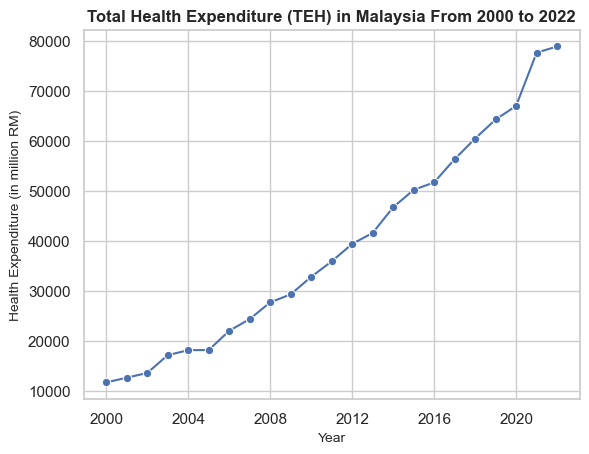

In [67]:
# Create a line plot showing the total health expenditure over time
sns.set(style="whitegrid") 
sns.lineplot(data= df, x= 'Year', y='Total Health Expenditure (TEH)',marker='o')
plt.title('Total Health Expenditure (TEH) in Malaysia From 2000 to 2022', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Health Expenditure (in million RM)', fontsize=10)
plt.savefig("TEH.png", dpi=1000)
plt.show()

The total health expenditure in Malaysia is plotted over year from 2000 to 2022.  The line chart shows that there is a gradual increase in health expenditure over 23 years, except that there is a steep increase from 2020 to 2021 (RM 67 million to RM 77 million). This is a result of increased health expenditure during COVID-19 pandemic, which includes testing, treatment, contact tracing, vaccination, medical equipment and other COVID-19-related spending (MOH, 2024). Since there is a strong positive trend observed from the line chart, the time series is not stationary. Therefore, differencing has to be applied to stabilise the mean when carrying out ARIMA modelling

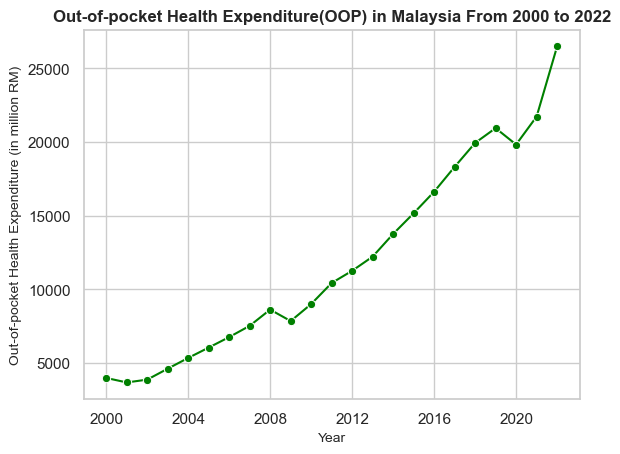

In [69]:
# Create a line plot showing the total health expenditure over time
sns.lineplot(data= df, x= 'Year', y='Out-of-pocket Health Expenditure(OOP)',color='green', marker='o')
sns.set(style="whitegrid") 
plt.title('Out-of-pocket Health Expenditure(OOP) in Malaysia From 2000 to 2022', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Out-of-pocket Health Expenditure (in million RM)', fontsize=10)
plt.show()

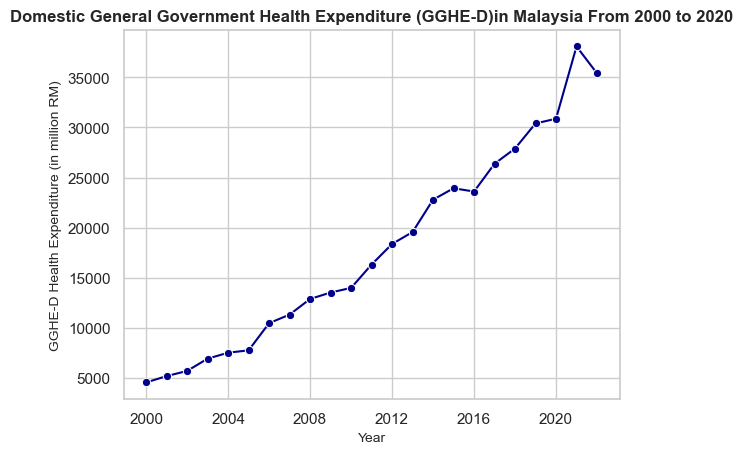

In [70]:
# Create a line plot showing the total health expenditure over time
sns.lineplot(data= df, x= 'Year', y= 'Domestic General Government Health Expenditure (GGHE-D)', color= 'darkblue', marker='o')
sns.set(style="whitegrid") 
plt.title('Domestic General Government Health Expenditure (GGHE-D)in Malaysia From 2000 to 2020', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('GGHE-D Health Expenditure (in million RM)', fontsize=10)
plt.show()

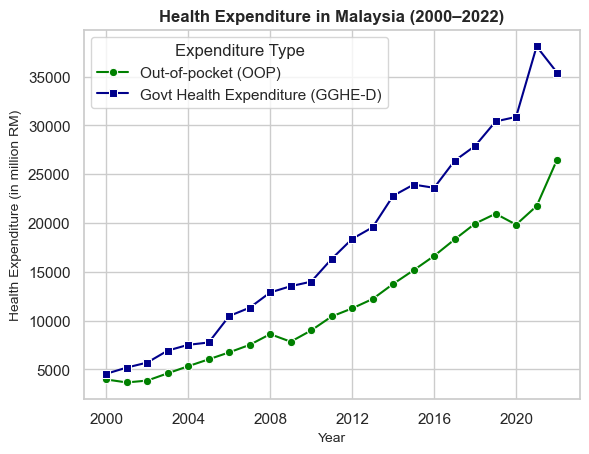

In [71]:
sns.set(style="whitegrid")

# Plot OOP
sns.lineplot(data=df, x='Year', y='Out-of-pocket Health Expenditure(OOP)', label='Out-of-pocket (OOP)', color='green', marker='o')

# Plot Government expenditure
sns.lineplot(data=df, x='Year', y='Domestic General Government Health Expenditure (GGHE-D)', label='Govt Health Expenditure (GGHE-D)', 
             color='darkblue', marker='s')

# Titles and labels
plt.title('Health Expenditure in Malaysia (2000–2022)', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Health Expenditure (in million RM)', fontsize=10)
plt.legend(title='Expenditure Type')
plt.savefig("oop and gghe.png", dpi=1000)
plt.show()

The two main health expenditure types is plotted on the line chart to show their trend from 2000 to 2022. It can be seen that Domestic General Government Health Expenditure shows a steeper upward trend when compared to Out-of-pocket Health Expenditure, despite both beginning at a similar starting point at 2000 (around RM 4,000 million to RM 5,000 million). There is a steady growth in both expenditure types from 2000 to 2022. It is noticeable that out-of-pocket health expenditure slightly reduced during 2008 to 2009, which is likely related to the 2008 economic crisis, leading to a reduction in individuals' or household health spending.

Health expenditure exhibited fluctuation from 2019 to 2022. GGHE-D shows a sharp rise from 2020 to 2021, acting as the main contributor to the overall increase in total health expenditure, before a slight decline in 2022. The OOP decreased slightly to RM 20,000 million in 2019, then increased steeply to around RM 27,000 million in 2022. This can be suggested by the initial impact on the economy that leads to reduced income and increased unemployment rate due to the lockdown, which reflects in reduced household healthcare spending. As the number of COVID-19 cases in Malaysia increased between 2020 and 2022, this led to a rise in OOP during the pandemic, due to an increased demand for private healthcare services, for instance, private hospitals, private medical clinics and private pharmacies.  (MOH, 2024). 


### Correlation table and heatmap

Generate Correlation table and view on heatmap

In [75]:
#rearrange column
df = df[['Total Health Expenditure (TEH)','Domestic General Government Health Expenditure (GGHE-D)','Out-of-pocket Health Expenditure(OOP)',
         'Gross Domestic Product (GDP)', 'Population (in thousands)', 'Physicians (per 1,000 people)',
         'Hospital beds (per 1,000 people)', 'Population ages 65 and above, total',         
         'Population growth (annual %)', 'Life expectancy at birth, total (years)',
         'Mortality rate, infant (per 1,000 live births)']]

#rename the column using shortform for easier views
short_name= {'Total Health Expenditure (TEH)':'TEH','Domestic General Government Health Expenditure (GGHE-D)':'GGHE', 
             'Gross Domestic Product (GDP)' :'GDP', 'Population (in thousands)' :'Pop', 'Out-of-pocket Health Expenditure(OOP)':'OOP', 
             'Physicians (per 1,000 people)' :'Phys No.', 'Hospital beds (per 1,000 people)':'HospBed No.', 
             'Population ages 65 and above, total':'Pop65', 'Mortality rate, infant (per 1,000 live births)':'Infant Mort', 
             'Population growth (annual %)' :'Pop growth', 'Life expectancy at birth, total (years)' :'Life Exp'}

df_acronym= df.rename(columns= short_name)

# view correlation between variables
corr= df_acronym.corr()
corr


,TEH,GGHE,OOP,GDP,Pop,Phys No.,HospBed No.,Pop65,Pop growth,Life Exp,Infant Mort
TEH,1.000000,0.997741,0.990366,0.990559,0.981980,0.990829,0.133438,0.998275,-0.960916,0.633198,-0.229408
GGHE,0.997741,1.000000,0.983361,0.986215,0.981347,0.987597,0.118071,0.994231,-0.960335,0.627350,-0.239103
OOP,0.990366,0.983361,1.000000,0.994377,0.970553,0.979319,0.141662,0.991357,-0.928127,0.636285,-0.195222
GDP,0.990559,0.986215,0.994377,1.000000,0.987397,0.976892,0.070809,0.991532,-0.943016,0.696544,-0.264154
Pop,0.981980,0.981347,0.970553,0.987397,1.000000,0.969671,-0.026406,0.985280,-0.954331,0.758853,-0.363197
Phys No.,0.990829,0.987597,0.979319,0.976892,0.969671,1.000000,0.186194,0.992117,-0.957336,0.618493,-0.178977
HospBed No.,0.133438,0.118071,0.141662,0.070809,-0.026406,0.186194,1.000000,0.121666,-0.122022,-0.478064,0.753074
Pop65,0.998275,0.994231,0.991357,0.991532,0.985280,0.992117,0.121666,1.000000,-0.958356,0.657763,-0.244597
Pop growth,-0.960916,-0.960335,-0.928127,-0.943016,-0.954331,-0.957336,-0.122022,-0.958356,1.000000,-0.652299,0.284473
Life Exp,0.633198,0.627350,0.636285,0.696544,0.758853,0.618493,-0.478064,0.657763,-0.652299,1.000000,-0.672114


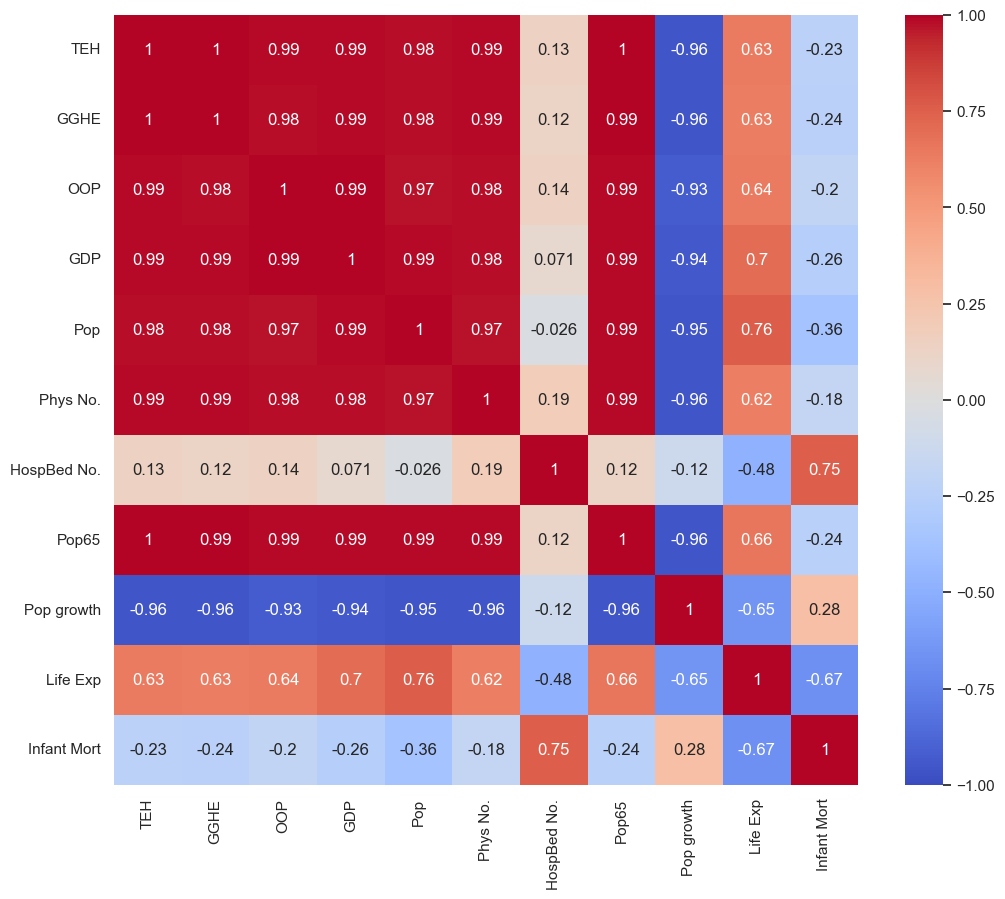

In [76]:
# generate heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, cmap= 'coolwarm', vmin= -1, vmax= 1,annot= True, annot_kws={"size": 12})
plt.savefig("correlation heatmap.png", dpi=1000)

Correlation between the variables is computed and plotted into a heatmap by using the seaborn library. From the correlation heatmap, there is a strong positive correlation between total health expenditure (TEH), domestic general government health expenditure (GGHE-D) and out-of-pocket health expenditure (OOP), due to the fact that GGHE-D and OOP are the components that form TEH. Aside from that, gross domestic product (GDP), population in thousands (Pop), total population aged 65 years old (Pop 65) and number of physicians per 1000 people have a strong positive correlation with all three of the health expenditures. Life expectancy at birth (Life Exp) has a moderate positive correlation with health expenditures, ranging between 0.63 to 0.64. 

Population growth in annual % (Pop growth) has a strong negative correlation with health expenditures (-0.96 to -0.93). 
Furthermore, the number of hospital beds has a weak positive correlation to total health expenditure (0.13), general government health expenditure (0.12) and out-of-pocket expenditure (0.14).  There is also a weak negative correlation between infant mortality rate and health expenditure, ranging from -0.2 to -0.24. 


## Feature Engineering

The number of hospital beds and the infant mortality rate weakly correlate with health expenditures. Therefore, these two columns are not selected as the features in the machine learning models for the prediction of health expenditure. This step is to ensure the accuracy of the prediction. Also, the feature reduction can reduce the complexity of the model and reduce computational and time resources. 

In [80]:
# drop number of hospital bed and infant mortality due to weak correlation
df = df.drop(['Hospital beds (per 1,000 people)','Mortality rate, infant (per 1,000 live births)'], axis= 1 )


In [81]:
df

,Total Health Expenditure (TEH),Domestic General Government Health Expenditure (GGHE-D),Out-of-pocket Health Expenditure(OOP),Gross Domestic Product (GDP),Population (in thousands),"Physicians (per 1,000 people)","Population ages 65 and above, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,,
2000-01-01,11745,4554.199511,3972.924497,388168,22967.8160,0.681,890334.0,2.345,72.732
2001-01-01,12703,5189.533797,3666.999553,384006,23526.5385,0.702,927636.0,2.404,73.080
2002-01-01,13640,5704.470433,3858.893529,417367,24102.4765,0.723,971593.0,2.419,73.469
2003-01-01,17203,6927.368331,4601.107798,456095,24679.6020,0.735,1019321.0,2.366,73.727
2004-01-01,18200,7521.882374,5331.968897,516302,25256.7725,0.720,1068356.0,2.312,74.027
2005-01-01,18231,7759.413210,6036.772778,569371,25836.0715,0.776,1118786.0,2.268,74.370
2006-01-01,22072,10469.676324,6749.842141,625100,26417.9090,0.828,1171703.0,2.227,74.697
2007-01-01,24414,11323.238597,7515.631759,696910,26998.3885,0.876,1227773.0,2.174,74.961
2008-01-01,27758,12881.971119,8617.575839,806480,27570.0590,0.907,1287146.0,2.095,75.151


## Modelling

Two different machine learning algorithms will be used for data modelling.

1. Random Forest
2. ARIMA

The models will be trained on training data, evaluated with performance metrics namely Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and Coefficient of Determination (R² score) using test data. 

The initial modelling was conducted only on total health expenditure, without investigating deeper into its expenditure types (GGHE-D and OOP) and estimating to 2035. For Random Forest, features discussed in the feature engineering section are used for prediction, while for ARIMA, it is modelled based on its lagged data points.



### Random Forest

Random Forest is a supervised machine learning method that is chosen to model the dataset. Tree-based methods can be applied to regression problems, therefore suitable for the prediction of healthcare expenditures. The individual decision tree is easy to interpret, however, it is not as accurate as other supervised learning approaches. Random forest ensembles multiple decision trees, each having moderate predicting capability, to achieve higher forecasting accuracy at the cost of some interpretability.


The data is split into a training and testing set before conducting Random Forest. Data is split into 80% training set and 20% testing set, which means data from 2000 to 2018 is used as training data and 2019 to 2022 is used to evaluate the results. For the X_train and X_test, all the health expenditures columns are dropped, y_train and y_test use the data from Total Health Expenditure (TEH) only. 

In [86]:
# Split train and test
train = df.iloc[:-int(len(df) * 0.2)]
test = df.iloc[-int(len(df) * 0.2):]

# dropping health expenditure for X and use total health expenditure for y
X_train = train.drop(['Total Health Expenditure (TEH)','Domestic General Government Health Expenditure (GGHE-D)',
                      'Out-of-pocket Health Expenditure(OOP)'],axis =1)
y_train = train['Total Health Expenditure (TEH)']

# dropping health expenditure for X and use total health expenditure for y
X_test = test.drop(['Total Health Expenditure (TEH)','Domestic General Government Health Expenditure (GGHE-D)',
                    'Out-of-pocket Health Expenditure(OOP)'],axis =1)
y_test = test['Total Health Expenditure (TEH)']


In [87]:
print (X_train)

            Gross Domestic Product (GDP)  Population (in thousands)  \
Year                                                                  
2000-01-01                        388168                 22967.8160   
2001-01-01                        384006                 23526.5385   
2002-01-01                        417367                 24102.4765   
2003-01-01                        456095                 24679.6020   
2004-01-01                        516302                 25256.7725   
2005-01-01                        569371                 25836.0715   
2006-01-01                        625100                 26417.9090   
2007-01-01                        696910                 26998.3885   
2008-01-01                        806480                 27570.0590   
2009-01-01                        746679                 28124.7775   
2010-01-01                        833104                 28655.7765   
2011-01-01                        924685                 29162.0390   
2012-0

Next, the Random Forest Regressor is imported from sklearn.ensemble library. The model is instantiated with default parameters and fit to the training set. Prediction is done by using the X_test and the result is saved as y_pred.Then, the evaluation metrics are imported from the sklearn library and calculated from the difference between the prediction result with the actual total health expenditure. A line chart for comparison is plotted.

In [89]:
from sklearn.ensemble import RandomForestRegressor
#instanstiate the model and fit to train set
model = RandomForestRegressor(random_state=20)
model.fit(X_train, y_train)

# predict the result
y_pred = model.predict(X_test)

MAE: 15425.2775
RMSE: 17238.4805184513
R²: -6.248531969351933


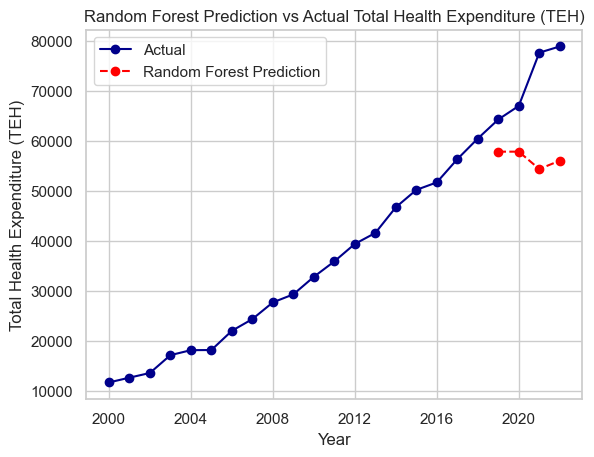

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# print evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# plot graph to show the plot
plt.plot(df.index, df['Total Health Expenditure (TEH)'], label='Actual', color= 'darkblue', marker='o')
plt.plot(X_test.index, y_pred, label='Random Forest Prediction', linestyle='--', color= 'red',marker ='o')
plt.xlabel('Year')
plt.ylabel('Total Health Expenditure (TEH)')
plt.legend()
plt.title('Random Forest Prediction vs Actual Total Health Expenditure (TEH)')
plt.savefig("Random Forest", dpi=1000)
plt.show()

The predicted result from the random forest is far from accurate when compared with the actual values for 2019 to 2022, as shown by RMSE of RM 16,951 million and negative R2 of -6. This is likely due to lagged values of health expenditure not being provided to the model as a feature, which can be included in future to improve the model result. Also, due to COVID-19, there is a steep increase in health expenditure from 2020 to 2021, likely due to increased health budget allocated for COVID-19-related health expenses, which is an aspect not learned by the model due to a lack of learning data. Furthermore, cross-validation and hyperparameter tuning were not done to utilise the model's full power. The small data size might be a limiting factor for random forest as not enough features are provided for the model to learn.

### ARIMA

ARIMA model is a time series predicting model that can be broken down into three parts: autoregressive (AR), integrated (I), and moving average (MA). It integrated autoregressive modelling and moving average modelling, which are distinct approaches for predicting time series data. ARIMA is represented as ARIMA (p, d, q) model, where p is the order of the autoregressive component, d is the degree of differencing involved, and q is the order of the moving average part, which corresponds to the three components above.  

Before modelling with ARIMA, the stationarity of the data must be confirmed. From the exploratory data analysis, it can be seen that there is a trend of increase for total health expenditure. The ADF test is run to confirm stationarity of the time series data to determine the need for differencing.  Adfuller is imported from statsmodels and applied to the total health expenditure column.

In [95]:
# conduct ADFtest
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Total Health Expenditure (TEH)'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])



ADF Statistic: 1.7961462692560515
p-value: 0.9983413430847589


p-value is 0.9986, which confirm that the time series is not stationary. Differencing needs to be done. The time series data is differenced once and saved as ‘TEH_diff1’. 

In [97]:
#differencing for one time to remove trend
df['TEH_diff1'] = df['Total Health Expenditure (TEH)'].diff().dropna()
df['TEH_diff1']


Year
2000-01-01        NaN
2001-01-01      958.0
2002-01-01      937.0
2003-01-01     3563.0
2004-01-01      997.0
2005-01-01       31.0
2006-01-01     3841.0
2007-01-01     2342.0
2008-01-01     3344.0
2009-01-01     1607.0
2010-01-01     3507.0
2011-01-01     3081.0
2012-01-01     3495.0
2013-01-01     2199.0
2014-01-01     5133.0
2015-01-01     3476.0
2016-01-01     1500.0
2017-01-01     4648.0
2018-01-01     4124.0
2019-01-01     3808.0
2020-01-01     2715.0
2021-01-01    10652.0
2022-01-01     1242.0
Name: TEH_diff1, dtype: float64

Before running the ARIMA (p, d, q) model, p, d, q terms need to be determined. ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) are two statistical tools used to determine the terms. The number of lagged values that ACF cuts off is set as q, and the same applies for p using PACF. A suitable value of d is selected by ensuring that after the differencing, the data resembles white noise, indicating all trends and seasonality have been eliminated. 

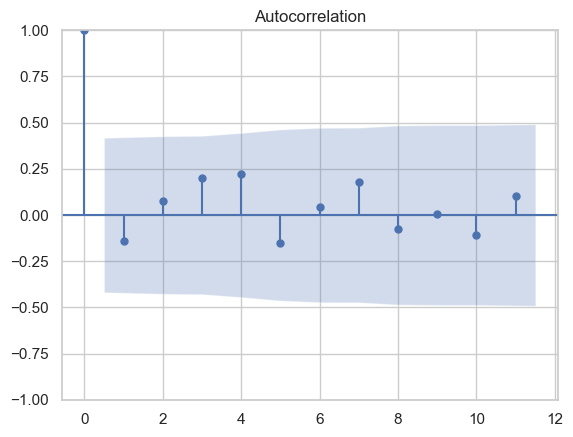

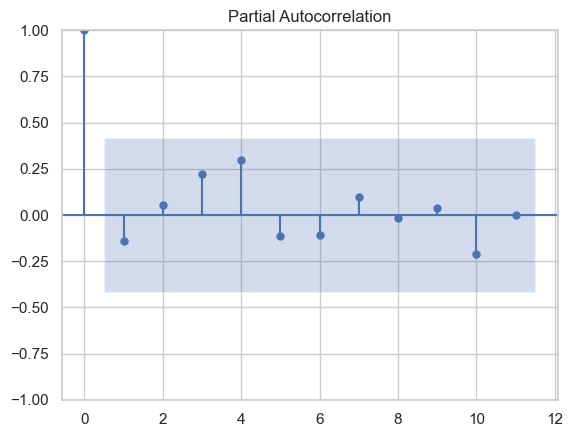

In [99]:
# Plot ACF and PACF for the differenced series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(df['TEH_diff1'].dropna())
# PACF plot
plot_pacf(df['TEH_diff1'].dropna())

plt.show()

 From the plots shown, it can be seen that the cut-off point is at 0. Therefore, p and q are set as 0 for the ARIMA model. 

In [101]:
from statsmodels.tsa.arima.model import ARIMA
# train test split
train = df.iloc[:-int(len(df) * 0.2)]
test = df.iloc[-int(len(df) * 0.2):]


#fitting the time series data to the ARIMA model
model = ARIMA(train['TEH_diff1'], order=(0, 1, 0)).fit()
print(model.summary())

# forecast result
forecasts = model.forecast(len(test))
forecasts

                               SARIMAX Results                                
Dep. Variable:              TEH_diff1   No. Observations:                   19
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -162.077
Date:                Mon, 30 Jun 2025   AIC                            326.154
Time:                        11:37:50   BIC                            327.045
Sample:                    01-01-2000   HQIC                           326.277
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.714e+06   1.65e+06      2.250      0.024    4.79e+05    6.95e+06
Ljung-Box (L1) (Q):                   6.28   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.01   Pr

C:\Users\henry\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\henry\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\henry\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


2019-01-01    4124.0
2020-01-01    4124.0
2021-01-01    4124.0
2022-01-01    4124.0
Freq: YS-JAN, Name: predicted_mean, dtype: float64

To plot the linechart to visualize and compare the predicted results with actual result, first order differencing need to be reversed using the step as shown belows. The undifferenced forecast is saved as variable 'undiff'.

In [103]:
# last actual value before the forecast period
last_actual = train['Total Health Expenditure (TEH)'].iloc[-1]

# initialize list to store undifferenced forecast
undiff = []

# reverse first-order differencing
for i, val in enumerate(forecasts):
    if i == 0:
        undiff.append(val + last_actual)
    else:
        undiff.append(val + undiff[-1])

# Convert to a Series
undiff = pd.Series(undiff, index=test.index)

In [104]:
# print evaluation metrics
print("MAE:", mean_absolute_error(test['Total Health Expenditure (TEH)'], undiff))
print("RMSE:", np.sqrt(mean_squared_error(test['Total Health Expenditure (TEH)'], undiff)))
print("R²:", r2_score(test['Total Health Expenditure (TEH)'], undiff))

MAE: 2191.25
RMSE: 2731.049752384603
R²: 0.8180670683839639


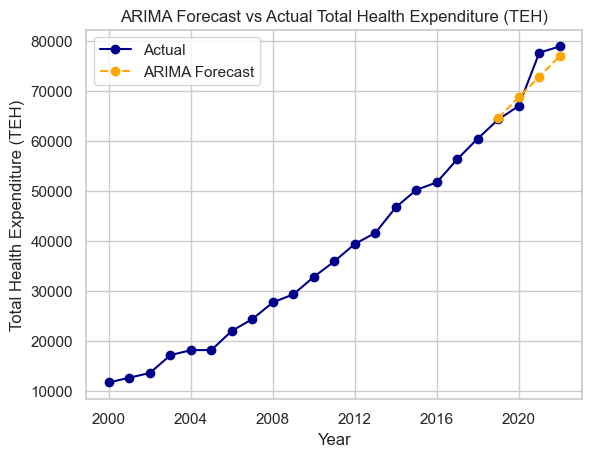

In [105]:
plt.plot(df.index, df['Total Health Expenditure (TEH)'], label='Actual', color= 'darkblue', marker='o')
plt.plot(test.index, undiff, label='ARIMA Forecast', marker='o', color= 'orange', linestyle='--')
plt.title('ARIMA Forecast vs Actual Total Health Expenditure (TEH)')
plt.xlabel('Year')
plt.ylabel('Total Health Expenditure (TEH)')
plt.legend()
plt.savefig("ARIMA", dpi=1000)
plt.show()

ARIMA has an acceptable forecast result with the actual TEH, with a small root mean squared error of RM 2731 million and a high R2 of 0.818.Aside from a larger gap with the actual TEH in 2021, the prediction data points lie closely with the actual TEH. This outcome is justifiable as the increased health expenditure caused by the impact of the pandemic was unexpected and difficult to predict.